# **1. Набор данных**
**1.1 О самом наборе** \\
Датасет был взят с kaggle. Он представляет из себя "Уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов контрольных мышей и мышей с синдромом Дауна". Задача - определить по уровням экспрессии белка, к какому "классу" отнситься мышь. \\
https://www.kaggle.com/ruslankl/mice-protein-expression \\
**1.2 Предварительная работа с данными** \\
Для начала заметим, что у нас есть числовые и категориальные типы данных. 


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N          1077 non-null   float64
 18  pPKCAB_N         1077 non-null   float64
 19  pRSK_N           1077 non-null   float64
 20  AKT_N            1077 non-null   float64
 21  BRAF_N           1077 non-null   float64
 22  CAMKII_N         1077 non-null   float64
 23  CREB_N           1077 non-null   float64
 24  ELK_N            1062 non-null   float64
 25  ERK_N            1077 non-null   float64
 26  GSK3B_N          1077 non-null   float64
 27  JNK_N            1077 non-null   float64
 28  MEK_N            1073 non-null   float64
 29  TRKA_N           1077 non-null   float64
 30  RSK_N            1077 non-null   float64
 31  APP_N            1077 non-null   float64
 32  Bcatenin_N       1062 non-null   float64
 33  SOD1_N           1077 non-null   float64
 34  MTOR_N           1077 non-null   float64
 35  P38_N            1077 non-null   float64
 36  pMTOR_N          1077 non-null   float64
 37  DSCR1_N          1077 non-null   float64
 38  AMPKA_N          1077 non-null   float64
 39  NR2B_N           1077 non-null   float64
 40  pNUMB_N          1077 non-null   float64
 41  RAPTOR_N         1077 non-null   float64
 42  TIAM1_N          1077 non-null   float64
 43  pP70S6_N         1077 non-null   float64
 44  NUMB_N           1080 non-null   float64
 45  P70S6_N          1080 non-null   float64
 46  pGSK3B_N         1080 non-null   float64
 47  pPKCG_N          1080 non-null   float64
 48  CDK5_N           1080 non-null   float64
 49  S6_N             1080 non-null   float64
 50  ADARB1_N         1080 non-null   float64
 51  AcetylH3K9_N     1080 non-null   float64
 52  RRP1_N           1080 non-null   float64
 53  BAX_N            1080 non-null   float64
 54  ARC_N            1080 non-null   float64
 55  ERBB4_N          1080 non-null   float64
 56  nNOS_N           1080 non-null   float64
 57  Tau_N            1080 non-null   float64
 58  GFAP_N           1080 non-null   float64
 59  GluR3_N          1080 non-null   float64
 60  GluR4_N          1080 non-null   float64
 61  IL1B_N           1080 non-null   float64
 62  P3525_N          1080 non-null   float64
 63  pCASP9_N         1080 non-null   float64
 64  PSD95_N          1080 non-null   float64
 65  SNCA_N           1080 non-null   float64
 66  Ubiquitin_N      1080 non-null   float64
 67  pGSK3B_Tyr216_N  1080 non-null   float64
 68  SHH_N            1080 non-null   float64
 69  BAD_N            867 non-null    float64
 70  BCL2_N           795 non-null    float64
 71  pS6_N            1080 non-null   float64
 72  pCFOS_N          1005 non-null   float64
 73  SYP_N            1080 non-null   float64
 74  H3AcK18_N        900 non-null    float64
 75  EGR1_N           870 non-null    float64
 76  H3MeK4_N         810 non-null    float64
 77  CaNA_N           1080 non-null   float64
 78  Genotype         1080 non-null   object 
 79  Treatment        1080 non-null   object 
 80  Behavior         1080 non-null   object 
 81  class            1080 non-null   object 
dtypes: float64(77), object(5)
memory usage: 692.0+ KB
```
\\

Если внимательнее посмотреть на категориальные данные, то они полностью описывают искомый класс, поэтому для обучения мы не будем их использовать для обучения моделей. \\
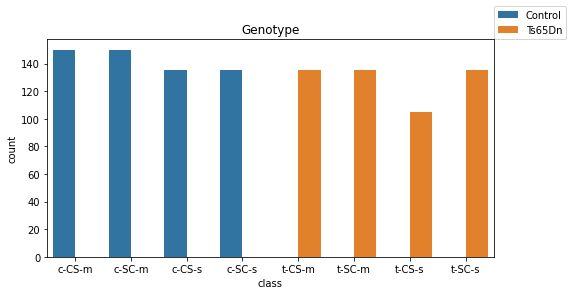
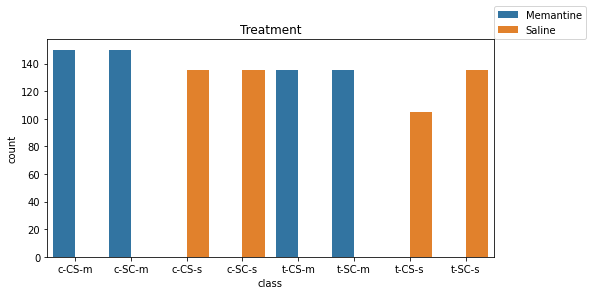
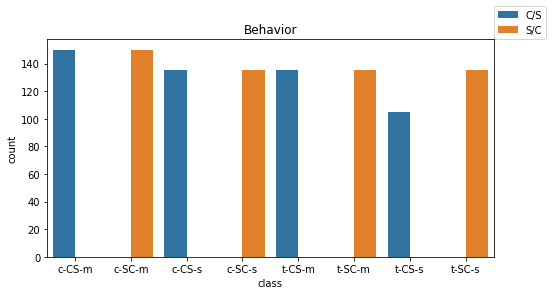

Далее избавимся от пустых значений с помощью SimpleImputer из библиотеки sklearn. Затем воспользуемся MinMaxScaler и переведем искомый класс из категориального типа в числовой с помощью OrdinalEncoder. Эти функции так же находятся в библиотеке sklearn. 

# **2. Обучение моделей и результаты**
**2.1 Модели** \\
Использовались модели: дерево решений, случайный лес и градиентный бустинг на деревьях решений. 
Первые две были взяты из sklearn. Градиентный бустинг из catboost. (библиотека Яндекса). Модели были взяты со стандартными настройками. Для обучения было использованно 20% датасета \\
**2.2 Результаты** \\
**Дерево решений: acc**: 0.842 **f1**: 0.840 \\
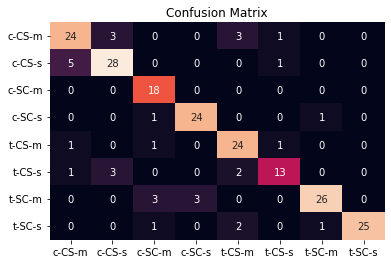
 \\
**Случайный лес: acc**: 0.99 **f1**: 0.992 \\
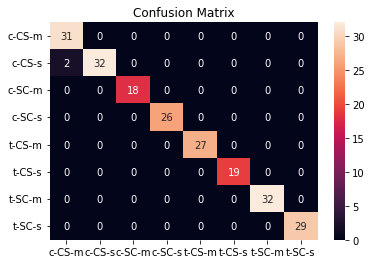
 \\
**Градиентный бустинг: acc**: 1.0 **f1**: 1.0 \\
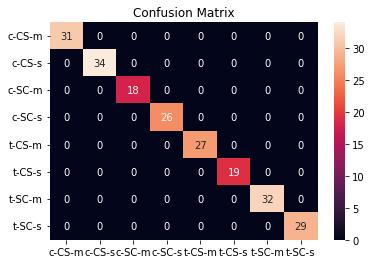



# **3. Вывод**
1. Данные оказались хорошо разделимы, даже обычное решающее дерево хорошо справилось \\
2. Идеальный результат бустинга получился из-за небольшого размера набора данных, а следовательно и тестовой выборки. 